# Plot the data

In [7]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from PIL import Image
import rasterio

In [4]:
input_dir = "/home/nus/Downloads/RS2_OK153952_PK1408399_DK1372518_FQ17_20150626_052324_HH_VV_HV_VH_SLC"

input_sar = os.path.join(input_dir, "imagery_HH.tif")
input_opt = os.path.join(input_dir, "opt.tiff")

os.path.exists(input_sar), os.path.exists(input_opt)

(True, True)

In [31]:
data_sar = rasterio.open(input_sar).read()
data_opt = rasterio.open(input_opt).read()
data_opt = data_opt.mean(axis=0, keepdims=True)  # (1, H, W)

print(data_sar.shape, data_opt.shape)

(2, 5371, 3500) (1, 2500, 472)


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


In [36]:
# reshape input_opt to input_sar shape
data_opt = np.array(Image.fromarray(data_opt[0]).resize((data_sar.shape[2], data_sar.shape[1]), Image.BILINEAR))
data_opt = data_opt[np.newaxis, :, :]
print(data_opt.shape)

(1, 5371, 3500)


In [37]:
data_sar_float = data_sar.astype(np.float32)
data_sar_mag = np.sqrt(data_sar_float[0]**2 + data_sar_float[1]**2)
data_sar_log = 20 * np.log1p(data_sar_mag)

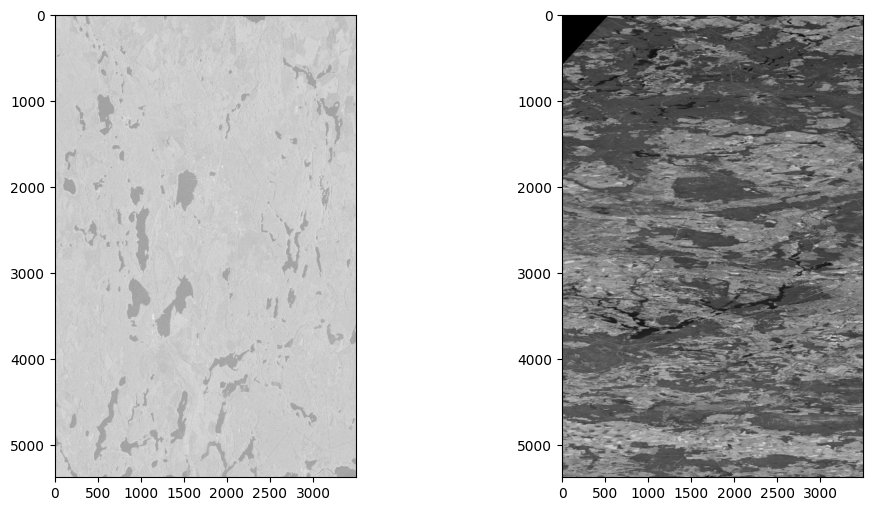

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(data_sar_log, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(data_opt[0], cmap='gray')